ImageView object:
  Display bands       :  [0, 110, 219]
  Interpolation       :  <default>
  RGB data limits     :
    R: [2632.0, 4536.0]
    G: [1017.0, 1159.0]
    B: [980.0, 1034.0]

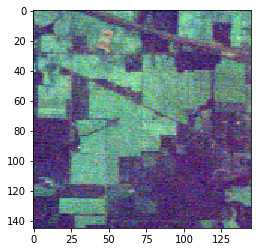

In [93]:
from spectral import *

img = open_image('92AV3C.lan')#.load()

imshow(img)


In [60]:
(m, c) = kmeans(img, 20, 30)

Initializing clusters along diagonal of N-dimensional bounding box.
Iteration 1...  0.0%

/home/wouter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Iteration 1...21024 pixels reassigned.
Iteration 2...  0.Iteration 2...11214 pixels reassigned.
Iteration 3...  0.Iteration 3...4726 pixels reassigned.
Iteration 4...  0.Iteration 4...1767 pixels reassigned.
Iteration 5...  0.Iteration 5...1240 pixels reassigned.
Iteration 6...  0.Iteration 6...1420 pixels reassigned.
Iteration 7...  0.Iteration 7...1442 pixels reassigned.
Iteration 8...  0.Iteration 8...1205 pixels reassigned.
Iteration 9...  0.Iteration 9...1041 pixels reassigned.
Iteration 10...  0.0Iteration 10...934 pixels reassigned.
Iteration 11...  0.0Iteration 11...977 pixels reassigned.
Iteration 12...  0.0Iteration 12...1027 pixels reassigned.
Iteration 13...  0.0Iteration 13...1019 pixels reassigned.
Iteration 14...  0.0Iteration 14...1011 pixels reassigned.
Iteration 15...  0.0Iteration 15...904 pixels reassigned.
Iteration 16...  0.0Iteration 16...702 pixels reassigned.
Iteration 17...  0.0Iteration 17...653 pixels reassigned.
Iteration 18...  0.0Iteration 18...579 pixels

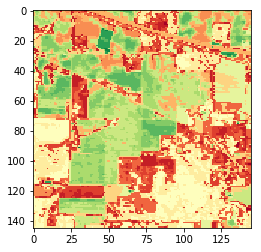

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pt = plt.imshow(m, cmap=cm.RdYlGn)

/home/wouter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """


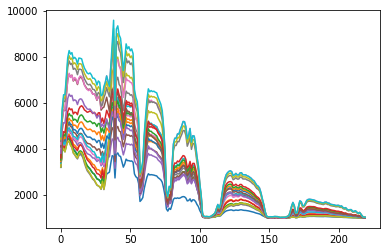

In [61]:
import pylab

pylab.figure()

pylab.hold(1)

for i in range(c.shape[0]):
    pylab.plot(c[i])

pylab.show()

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


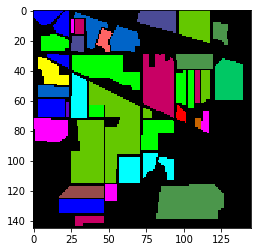

In [81]:
gt = open_image('92AV3GT.GIS').read_band(0)

v = imshow(classes=gt)

Setting min samples to 220
  Omitting class   1 : only 54 samples present
  Omitting class   7 : only 26 samples present
  Omitting class   9 : only 20 samples present
  Omitting class  13 : only 212 samples present
  Omitting class  16 : only 95 samples present
Processing...  0.0Processing...  9.1Processing... 18.2Processing... 27.3Processing... 36.4Processing... 45.5Processing... 54.5Processing... 63.6Processing... 72.7Processing... 81.8Processing... 90.9Processing... 100.Processing...done   


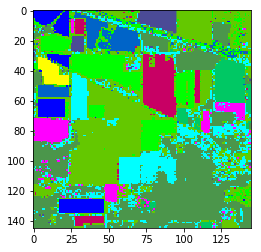

In [89]:
classes = create_training_classes(img, gt)

gmlc = GaussianClassifier(classes)

clmap = gmlc.classify_image(img)

v = imshow(classes=clmap)

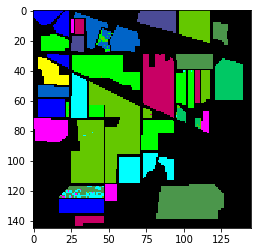

In [84]:
gtresults = clmap * (gt != 0)

v = imshow(classes=gtresults)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


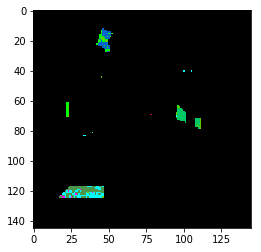

In [86]:
gterrors = gtresults * (gtresults != gt)

v = imshow(classes=gterrors)